In [6]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')

df.head

<bound method NDFrame.head of        index           time_stamp  stop                         stopName  \
0          1  2018-07-23 06:00:45   378                       Os.Piastów   
1          1  2018-07-23 06:00:47   612                         Borsucza   
2          1  2018-07-23 06:00:48   572                           Smolki   
3          1  2018-07-23 06:00:49   319                          Jubilat   
4          1  2018-07-23 06:00:49   322                      Filharmonia   
5          1  2018-07-23 06:00:50   325                            Wawel   
6          1  2018-07-23 06:00:50  1360         Plac Wszystkich Świętych   
7          1  2018-07-23 06:00:51   363                     Hala Targowa   
8          1  2018-07-23 06:00:52    78                         Batorego   
9          1  2018-07-23 06:00:52    77                   Teatr Bagatela   
10         1  2018-07-23 06:00:53   131                   Dworzec Główny   
11         1  2018-07-23 06:00:54   715                   

In [15]:
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

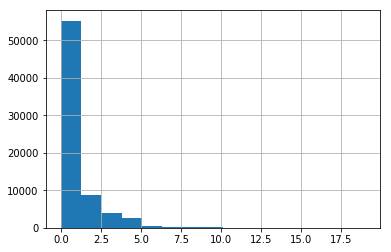

In [16]:
df.delay.hist(bins=15)

In [17]:
df.delay.describe()

count    71517.000000
mean         1.014039
std          1.357324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: delay, dtype: float64

In [18]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [61]:
df['delay_secs'] = df['delay'].map(lambda x: x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)

df['plannedTime_dt']=pd.to_datetime( df['plannedTime'])
df['hour'] = df['plannedTime_dt'].dt.hour
df['minute'] = df['plannedTime_dt'].dt.minute


df['number_direction_id'] = df.apply(lambda x: '{} {}'.format(x['number'],x['direction']), axis=1).factorize()[0]
df['stop_direction_id'] = df.apply(lambda x: '{} {}'.format(x['stop'],x['direction']), axis=1).factorize()[0]


X = df[ [ 'number', 'stop', 'direction_cat', 'vehicleId', 'seq_num', 'number_direction_id', 'stop_direction_id']].values
y = df[ 'delay_secs'].values

model = DecisionTreeRegressor(max_depth=10)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-48.90991823408615, 2.5265969943612703)

In [74]:
df[['minute']].head()

,minute
0,59
1,0
2,0
3,59
4,1


In [54]:
df.apply(lambda x: '{} {}'.format(x['number'],x['direction']), axis=1)

0             21 Kopiec Wandy
1                22 Walcownia
2        11 Czerwone Maki P+R
3                1 Wzgórza K.
4            8 Bronowice Małe
5             10 Kopiec Wandy
6                  1 Salwator
7                  1 Salwator
8           24 Bronowice Małe
9             20 Mały Płaszów
10              52 Os.Piastów
11          24 Bronowice Małe
12            9 Mistrzejowice
13               13 Bronowice
14           24 Kurdwanów P+R
15        3 Nowy Bieżanów P+R
16         50 Krowodrza Górka
17             20 Cichy Kącik
18        9 Nowy Bieżanów P+R
19          14 Bronowice Małe
20         50 Krowodrza Górka
21        9 Nowy Bieżanów P+R
22           22 Borek Fałęcki
23               5 Wzgórza K.
24               1 Wzgórza K.
25           22 Borek Fałęcki
26       52 Czerwone Maki P+R
27           19 Borek Fałęcki
28       13 Nowy Bieżanów P+R
29            11 Mały Płaszów
                 ...         
71487             22 Kombinat
71488            1 Wzgórza K.
71489    1

In [59]:
df.plannedTime.value_counts()

2018-07-23 07:04:00    93
2018-07-23 15:44:00    92
2018-07-23 06:44:00    92
2018-07-23 17:44:00    91
2018-07-23 08:44:00    91
2018-07-23 17:04:00    91
2018-07-23 08:24:00    90
2018-07-23 08:04:00    90
2018-07-23 16:04:00    90
2018-07-23 17:24:00    90
2018-07-23 07:24:00    90
2018-07-23 15:04:00    90
2018-07-23 07:44:00    89
2018-07-23 09:04:00    89
2018-07-23 18:04:00    89
2018-07-23 15:24:00    89
2018-07-23 16:24:00    88
2018-07-23 16:44:00    88
2018-07-23 18:24:00    86
2018-07-23 14:44:00    85
2018-07-23 15:46:00    85
2018-07-23 16:26:00    85
2018-07-23 16:46:00    85
2018-07-23 15:20:00    84
2018-07-23 18:26:00    84
2018-07-23 18:06:00    84
2018-07-23 16:06:00    84
2018-07-23 15:26:00    84
2018-07-23 16:40:00    84
2018-07-23 18:20:00    84
                       ..
2018-07-23 23:41:00    11
2018-07-23 23:43:00    11
2018-07-23 23:44:00    11
2018-07-23 23:45:00    11
2018-07-23 23:48:00     9
2018-07-23 23:51:00     8
2018-07-23 23:42:00     8
2018-07-23 2